<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Missing Data
---

### Learning Objectives
- Define MCAR, MAR, and NMAR.
- Describe various strategies for dealing with missing data.
- Understand the assumptions we make when using strategies to handle missing data.

### Credit
This lesson is adapted from a missing data workshop that Matt Brems presented at the Open Data Science Conference ([ODSC](https://odsc.com/)).  Check out his GitHub repo [here](https://github.com/matthewbrems/missing-data-workshop?fbclid=IwAR1LGjaIen-ITLndPN1ODV1lYZBvxsHDs0DgIaPkuxpXMsQRBT8eAPI-0sI).

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

# Set random seed.
np.random.seed(42)

In [2]:
# Bring in our data of age, partnered, children, and income data
# where income is linearly related to age, partnered, and children.
income = pd.read_csv('../data/income.csv') 
income_missing = pd.read_csv('../data/income_missing.csv') 

# Check out first 10 rows
income_missing.head(10)

,children,age,partnered,income
0,1,35.0,1,56531.361287
1,2,58.0,1,93026.182530
2,0,49.0,1,42693.010819
3,0,44.0,1,83680.128218
4,1,26.0,0,28845.520835
5,1,26.0,1,24898.840890
6,2,22.0,1,67152.008080
7,2,55.0,1,35047.373500
8,5,44.0,1,17245.869659
9,1,NaN,1,75749.529176


In [3]:
# create a function to compare histograms of original & imputed data
def compare_histograms(imputed_column, original_column, x_label, y_label = 'Frequency'):
    fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols = 1, figsize = (16,9))

    # Set axes of histograms.
    mode = statistics.mode(imputed_column)
    rnge = max(original_column) - min(original_column)
    xmin = min(original_column) - 0.02 * rnge
    xmax = max(original_column) + 0.02 * rnge
    ymax = 40

    ax0.set_xlim(xmin, xmax)
    ax0.set_ylim(0, ymax)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(0, ymax)

    # Set top labels.
    ax0.set_title('Real Histogram', position = (0,1), ha = 'left', fontsize = 25)
    ax0.set_xlabel(x_label, position = (0,0), ha = 'left', fontsize = 25, color = 'grey', alpha = 0.85)
    ax0.set_ylabel(y_label, position = (0,1), ha = 'right', va = 'top', fontsize = 25, rotation = 0, color = 'grey', alpha = 0.85)
    ax0.set_xticks([])
    ax0.set_yticks([])

    # Generate top histogram.
    ax0.hist(original_column, bins = 15, color = '#185fad', alpha = 0.75, label = '')
    ax0.axvline(np.mean(original_column), color = '#185fad', lw = 5, label = 'True Mean')
    ax0.legend(prop={'size': 15}, loc = 1)

    # Set bottom labels.
    ax1.set_title('Imputed Histogram', position = (0,1), ha = 'left', fontsize = 25)
    ax1.set_xlabel(x_label, position = (0,0), ha = 'left', fontsize = 25, color = 'grey', alpha = 0.85)
    ax1.set_ylabel(y_label, position = (0,1), ha = 'right', va = 'top', fontsize = 25, rotation = 0, color = 'grey', alpha = 0.85)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Generate bottom histogram.
    ax1.hist(imputed_column, bins = 15, color = 'orange', alpha = 0.75, label = '', stacked = True)
    ax1.axvline(np.mean(original_column), color = '#185fad', lw = 5, label = 'True Mean')
    ax1.axvline(np.mean(imputed_column), color = 'darkorange', lw = 5, label = 'Imputed Mean')
    ax1.legend(prop={'size': 15}, loc = 1)

    plt.tight_layout();

### Method 1: Deductive Imputation

We use logical rules to fill in missing values.
- Survey asks if the respondent was the victim of a crime in the last twelve months.
- Respondent says no.
- Survey then asks if the respondent was the victim of a violent crime in the last twelve months.
- Respondent leaves this answer blank.

**Pros**:
- Can be used regardless of missingness type
- Requires no inference

**Cons**:
- Requires specific coding
- Can be time consuming
- May not be possible

### Method 2: Mean/Median/Mode Imputation

For any “NA” value in a given column, replace “NA” with the mean, median, or mode.

**Pros**:
- Quick
- Easy to implement
- Seems reasonable

**Cons**:
- Can significantly distort histogram
- Underestimates variance
- Should only be considered if data is MCAR

#### Mean Imputation

In [4]:
# Which columns have missing values?
income_missing.isnull().sum()

children      0
age          30
partnered     0
income        0
dtype: int64

In [5]:
# Let's impute missing values in the age column with the mean
mean_age = np.mean(income_missing['age'])
mean_age

39.5

In [6]:
income_missing['age_mean_imputed'] = income_missing['age'].fillna(mean_age)

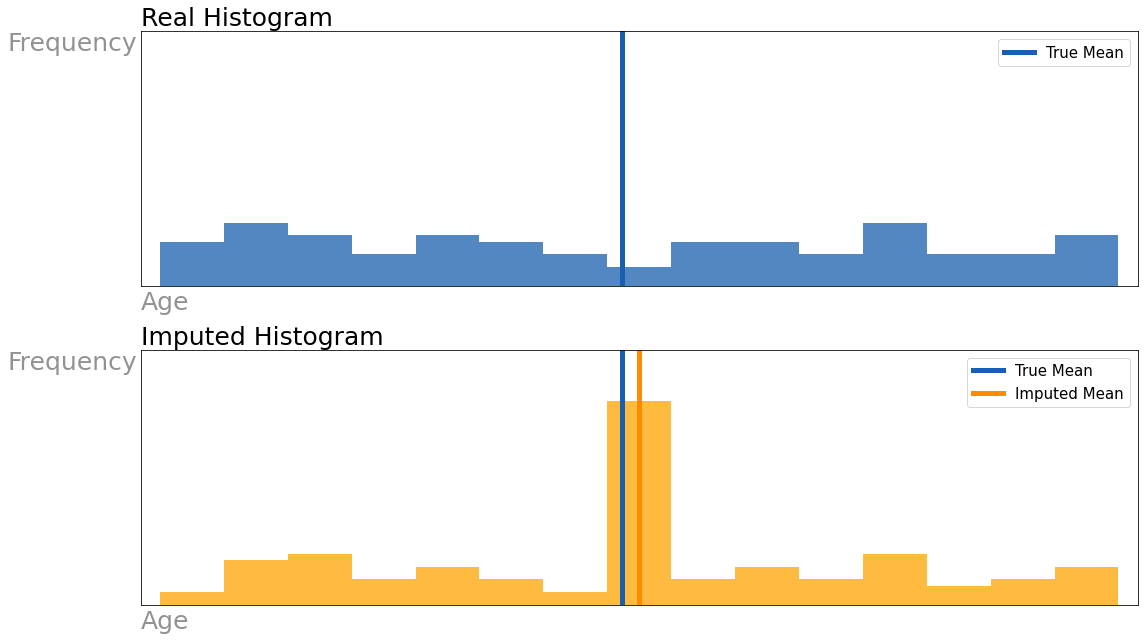

In [7]:
compare_histograms(imputed_column = income_missing['age_mean_imputed'],
                   original_column = income['age'],
                   x_label = 'Age',
                   y_label = 'Frequency')

We are underestimating the variance here.


Why is this a bad thing?
- If we underestimate variance in a confidence interval, our confidence interval gets smaller for the same level of confidence!
    - Our results artificially look more precise... but only because we imputed the mean!
- If we underestimate the variance in a hypothesis test, our p-value will artificially get smaller.
    - Our p-value may look significant... but only because we imputed the mean!

#### Median Imputation

In [8]:
# Let's impute missing values in the age column with the median
med_age = np.median(income_missing['age'].dropna())
med_age

40.5

In [9]:
income_missing['age_med_imputed'] = income_missing['age'].fillna(med_age)

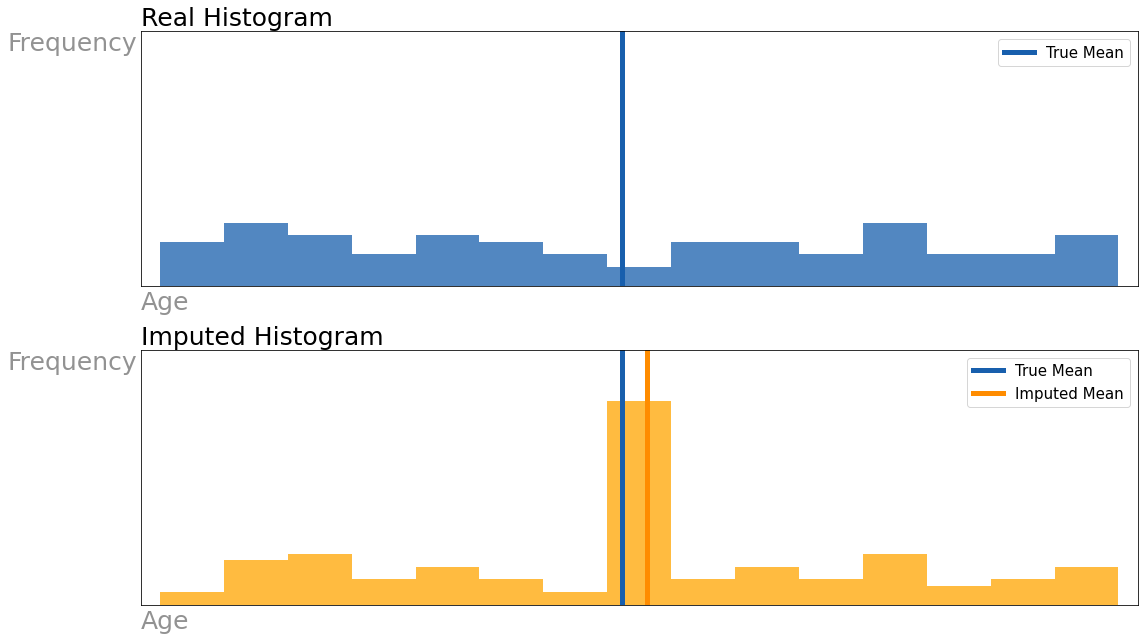

In [10]:
compare_histograms(imputed_column = income_missing['age_med_imputed'],
                   original_column = income['age'],
                   x_label = 'Age',
                   y_label = 'Frequency')

We are underestimating the variance here.


Why is this a bad thing?
- If we underestimate variance in a confidence interval, our confidence interval gets smaller for the same level of confidence!
    - Our results artificially look more precise... but only because we imputed the mean!
- If we underestimate the variance in a hypothesis test, our p-value will artificially get smaller.
    - Our p-value may look significant... but only because we imputed the mean!m

#### Mode Imputation

In [11]:
# Let's impute missing values in the age column with the mode
mode_age = statistics.mode(income_missing['age'])
mode_age

44.0

In [12]:
income_missing['age_mode_imputed'] = income_missing['age'].fillna(mode_age)

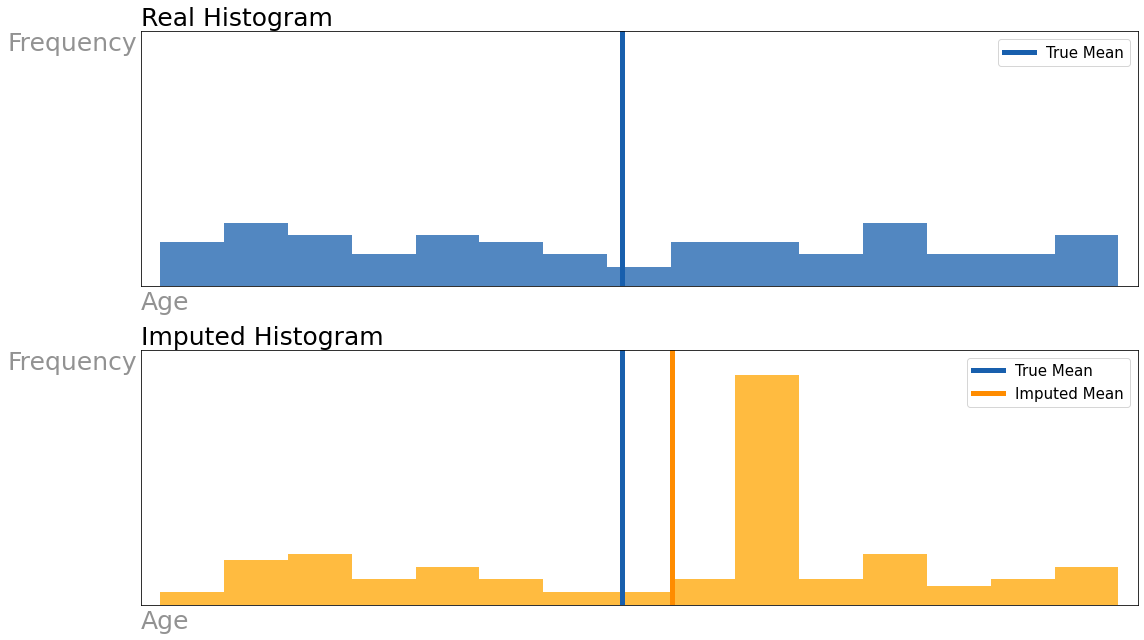

In [13]:
compare_histograms(imputed_column = income_missing['age_mode_imputed'],
                   original_column = income['age'],
                   x_label = 'Age',
                   y_label = 'Frequency')

### Make your life easier -> Simple Imputer in sklearn

Note: Train-test-split BEFORE doing this if you are going to model later to avoid data leakage!

Documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer).

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
# re-load data
income_missing = pd.read_csv('../data/income_missing.csv') 

In [16]:
imp = SimpleImputer(strategy = 'mean')
imp_income_missing = imp.fit_transform(income_missing)

pd.DataFrame(imp_income_missing, columns = income_missing.columns).head(10)

,children,age,partnered,income
0,1.0,35.0,1.0,56531.361287
1,2.0,58.0,1.0,93026.182530
2,0.0,49.0,1.0,42693.010819
3,0.0,44.0,1.0,83680.128218
4,1.0,26.0,0.0,28845.520835
5,1.0,26.0,1.0,24898.840890
6,2.0,22.0,1.0,67152.008080
7,2.0,55.0,1.0,35047.373500
8,5.0,44.0,1.0,17245.869659
9,1.0,39.5,1.0,75749.529176


### Method 3: Single Regression Imputation

Train a model on the rows of your data that are fully observed.
- Suppose I’m missing income for some people, but have observed age and highest level of education for everybody.
- X = age and highest level of education, Y = income.
- Fit a model.
- For any “NA” value in a given column, replace “NA” with predicted value from that model.

**Pros**:
- Seems reasonable
- A little more nuanced than mean/median/mode imputation

**Cons**:
- Still distorts histogram
- Underestimates variance
- Should only be considered if data is MCAR or MAR.

In [17]:
# re-load data
income_missing = pd.read_csv('../data/income_missing.csv') 
income_missing.tail()

,children,age,partnered,income
95,1,40.0,1,74090.088031
96,1,41.0,1,52304.403273
97,3,37.0,0,10688.919618
98,4,NaN,0,68232.834868
99,4,24.0,1,36785.514708


In [18]:
# Import linear regression
from sklearn.linear_model import LinearRegression

In [19]:
# Save new dataframe without any missing values
income_new = income_missing.dropna()

In [20]:
# Set up model
X_columns = income_new[['partnered', 'children', 'income']]
impute_column = income_new['age']

# Instantiate
model = LinearRegression()

# Fit
model.fit(X_columns, impute_column)

LinearRegression()

In [21]:
# save indices of missing values
missing_idx = income_missing.index[income_missing['age'].isnull()]

In [22]:
# Impute missing values with the prediciton from the model
income_missing['age_regression_imputed'] = [income_missing.loc[i,'age'] if i not in missing_idx
     else model.predict(pd.DataFrame(income_missing.loc[i,['children', 'partnered', 'income']]).T)[0]
     for i in range(income_missing.shape[0])]

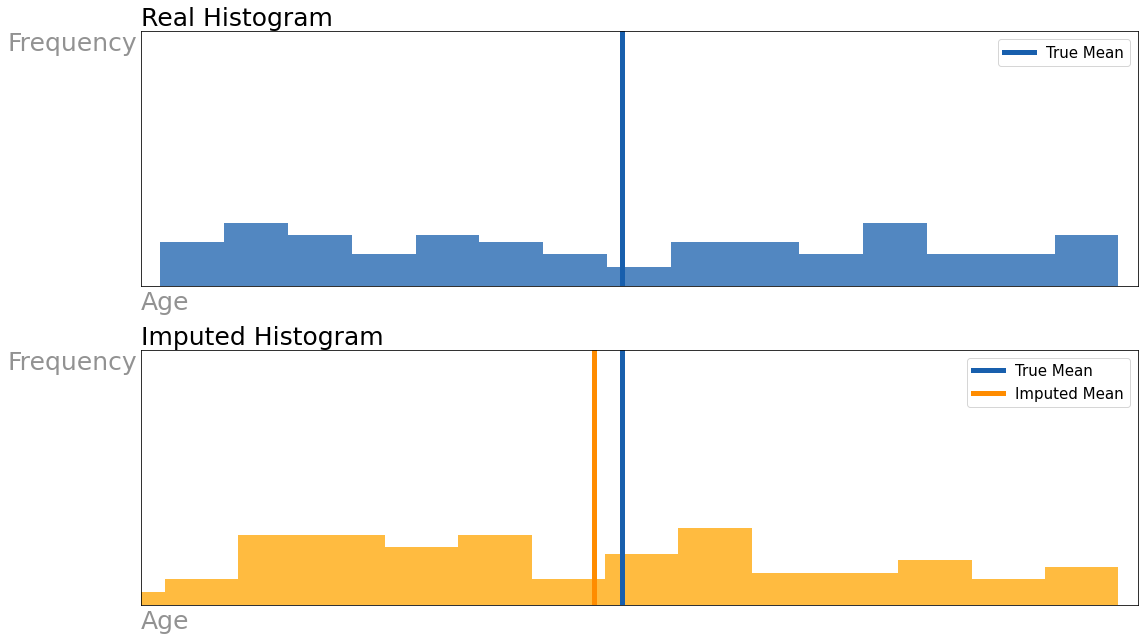

In [23]:
compare_histograms(imputed_column = income_missing['age_regression_imputed'],
                   original_column = income['age'],
                   x_label = 'Age',
                   y_label = 'Frequency')

![](../images/deterministic_imputation.png)

[source](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)

### Make your life easier -> Iterative Imputer in sklearn

Documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer).

From [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer): 
> Note: This estimator is still experimental for now: the predictions and the API might change without any deprecation cycle. To use it, you need to explicitly import enable_iterative_imputer:

```python
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
```

Again, make sure to fit this only on training data if you are using this for a model (you can transform testing data).

In [24]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [25]:
income_missing = pd.read_csv('../data/income_missing.csv') 

In [26]:
it_imp = IterativeImputer(estimator = LinearRegression())
it_imp_income_missing = it_imp.fit_transform(income_missing)

it_imp_income_missing = pd.DataFrame(it_imp_income_missing, columns = income_missing.columns)

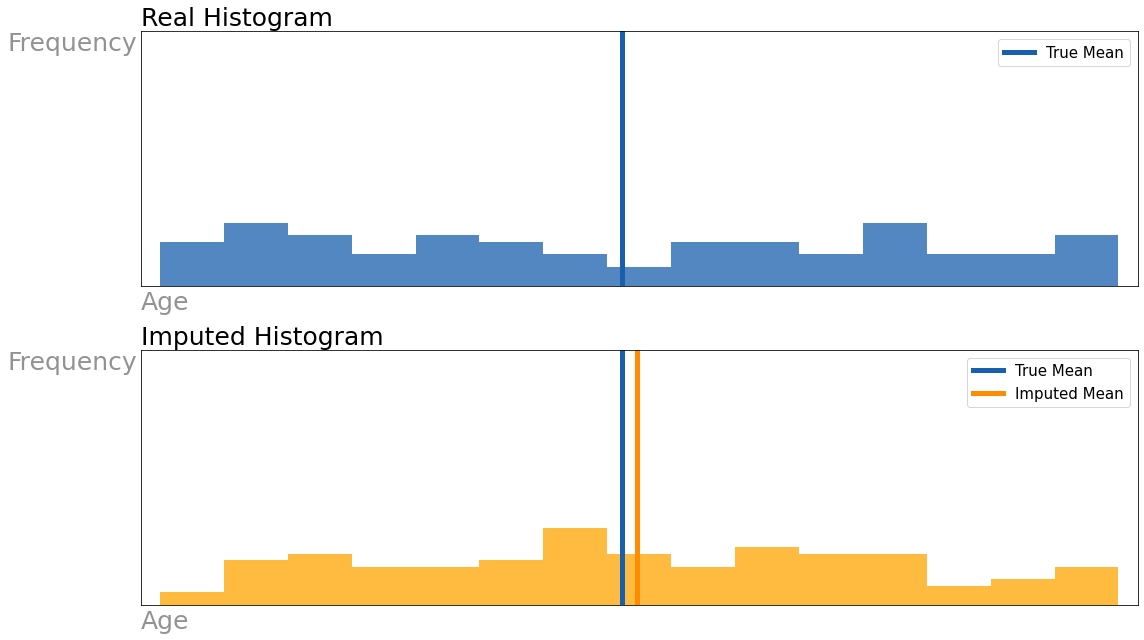

In [27]:
compare_histograms(imputed_column = it_imp_income_missing['age'],
                   original_column = income['age'],
                   x_label = 'Age',
                   y_label = 'Frequency')

In [28]:
# try it with the defaul model
income_missing = pd.read_csv('../data/income_missing.csv') 

it_imp = IterativeImputer()
it_imp_income_missing = it_imp.fit_transform(income_missing)

it_imp_income_missing = pd.DataFrame(it_imp_income_missing, columns = income_missing.columns)

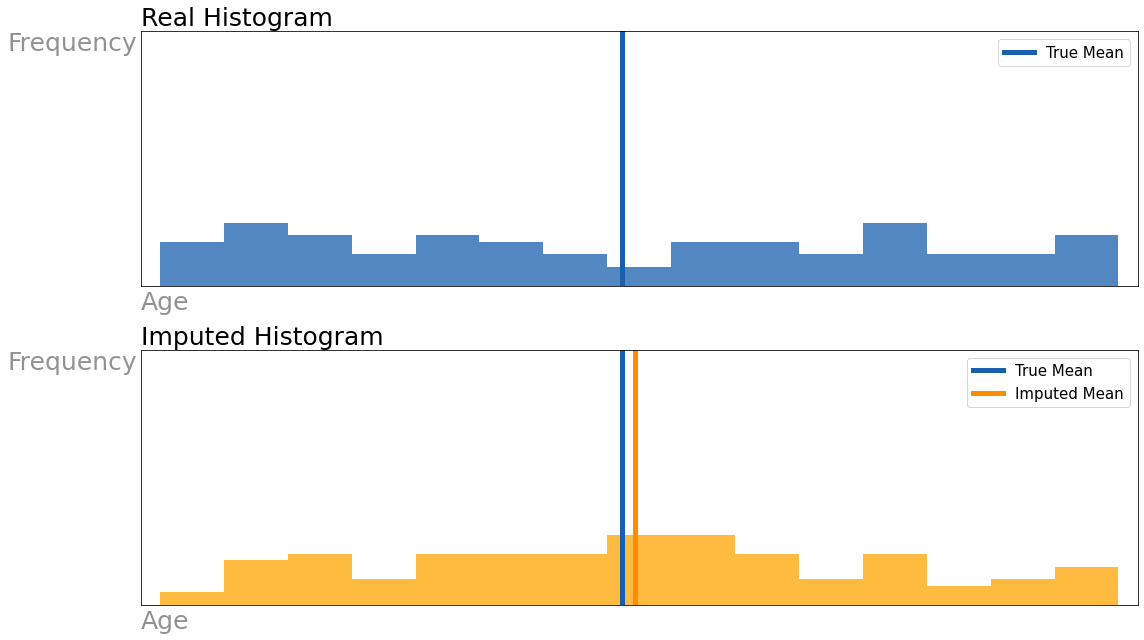

In [29]:
compare_histograms(imputed_column = it_imp_income_missing['age'],
                   original_column = income['age'],
                   x_label = 'Age',
                   y_label = 'Frequency')

### Method 4: Nearest Neighbors Imputation

Documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer).

In [30]:
from sklearn.impute import KNNImputer

In [31]:
income_missing = pd.read_csv('../data/income_missing.csv') 

In [32]:
knn_imp = KNNImputer()
knn_imp_income_missing = knn_imp.fit_transform(income_missing)

knn_imp_income_missing = pd.DataFrame(knn_imp_income_missing, columns = income_missing.columns)

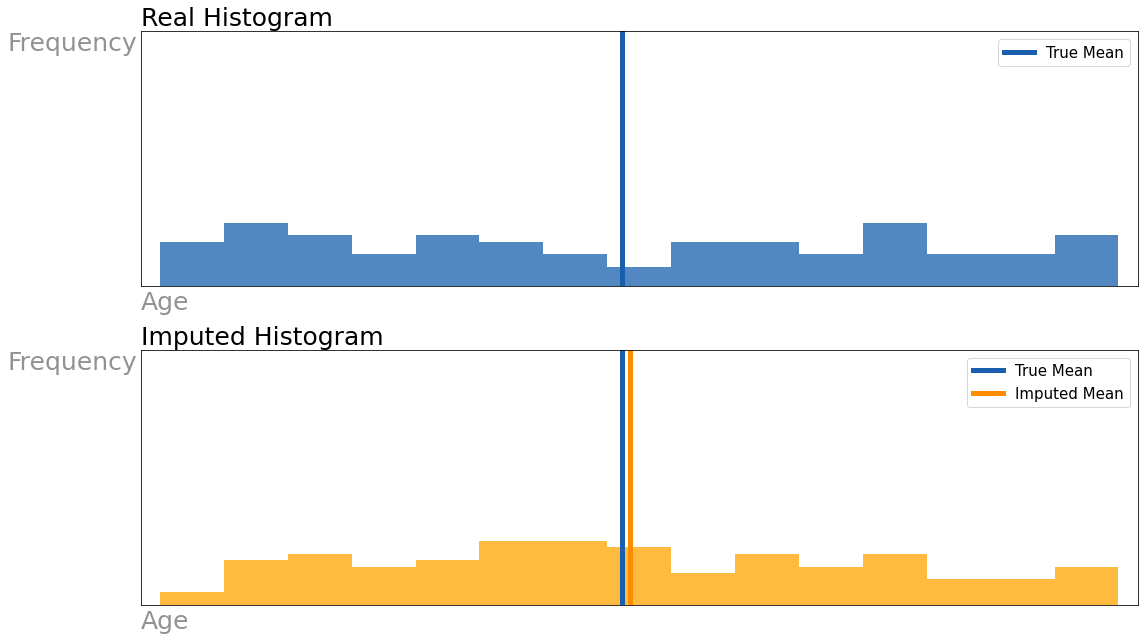

In [33]:
compare_histograms(imputed_column = knn_imp_income_missing['age'],
                   original_column = income['age'],
                   x_label = 'Age',
                   y_label = 'Frequency')

### Method 5: Multiple Imputation

If we want to account for the randomness in our data, we can fill in missing values with some amount of randomness/uncertainty.

Replacing an NA with one value treats things like we know the true value.

Therefore, we need to impute multiple times.
- We will make multiple copies (say 10) of our dataset.
- We will use [random regression imputation](https://statisticsglobe.com/regression-imputation-stochastic-vs-deterministic/) to generate one value for each NA in each dataset.
- Once each of our 10 datasets are complete, we will do our “final model” or “final analysis” on each dataset.
- We will then combine the results of our multiple models together, just like we aggregate results in an ensemble model.

![](../images/proper_imputation.png)


If you’re **generating predictions**, you can just average your predictions together in a regression problem or select the plurality class in a classification problem.

If your goal is to do **inference** (e.g. understand how X affects Y) and are fitting a linear model to each dataset, then you get a slope and y-intercept for each model.
- There are a set of tools, called Rubin’s rules, that will allow you to take the slopes and y-intercepts from each model and combine them together.
- Check out documentation in the repo if interested!

[IterativeImputer](https://scikit-learn.org/stable/modules/impute.html#multiple-vs-single-imputation) in sklearn can help with this!

### Missing Indicator Column

We can add a column about which values were imputed/missing and use that as a feature in our model. This can help when there is a pattern in what is missing and our target and may help our model.

See another example of this [here](https://nbviewer.jupyter.org/github/justmarkham/scikit-learn-tips/blob/master/notebooks/09_add_missing_indicator.ipynb).

There are several ways we can do this:
1. Set `add_indicator = True` in Simple Imputer or Iterative Imputer if you are using these:
```python
imputer = SimpleImputer(add_indicator=True)
imputer.fit_transform(X)
```
2. Use the `MissingIndicator` transformer in [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html#sklearn.impute.MissingIndicator).

In [ ]:
income_missing = pd.read_csv('../data/income_missing.csv') 

it_imp = SimpleImputer(strategy='median', add_indicator=True)
it_imp_income_missing = it_imp.fit_transform(income_missing)

pd.DataFrame(it_imp_income_missing).head()

,0,1,2,3,4
0,1.0,35.0,1.0,56531.361287,0.0
1,2.0,58.0,1.0,93026.182530,0.0
2,0.0,49.0,1.0,42693.010819,0.0
3,0.0,44.0,1.0,83680.128218,0.0
4,1.0,26.0,0.0,28845.520835,0.0


---
### To the slides!
---

### BONUS: Pattern Submodel Approach

Big Picture: We will break our dataset into subsets based on missingness pattern. We will then build one model on each subset, creating many different models.

![](../images/pattern_submodel.jpeg)

[image source](https://opendatascience.com/data-imputation-beyond-mean-median-and-mode/)

**Pros**:
- The pattern submodel method will outperform imputation methods when your data are NMAR, and will perform about as well as imputation methods when your data are MCAR or MAR.
- You can generate predictions for test observations containing missing data.
- It does not require missingness assumptions!

**Cons**:
- This is not a well-understood method for inference.

Read more about this method [here](https://academic.oup.com/biostatistics/article/21/2/236/5092384).

See an example of this [here](https://github.com/sarahmercaldo/MissingDataAndPrediction) - note that this example is done in R.